In [3]:
from src.utils.mouselab_standalone import MouselabJas
from src.utils.distributions import Normal
from src.utils.env_creation import create_tree, create_init
from src.utils.env_export import create_json
from src.utils.data_classes import MouselabConfig
from simulation import run_simulation
from src.policy.jas_voc_policy import JAS_voc_policy
from src.policy.jas_policy import RandomPolicy, ExhaustivePolicy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from src.policy.jas_policy import RandomNPolicy


sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1.5)
sns.set_theme()

%load_ext autoreload
%autoreload 2

In [13]:
num_projects = 3
num_criteria = 3
init = create_init([0]*10, [0]+([40,20,40]*3))
expert_costs = [0.5, 1, 0.6]
expert_taus = [0.3, 0.5, 0.2]
criteria_scale = [0.2, 3, 1.5]

ground_truth = [0, 12, 12, 12, 15, 5, 10, 12, 12, 12]
config = MouselabConfig(ground_truth=ground_truth)
env = MouselabJas(num_projects, num_criteria, init, expert_costs, expert_taus, criteria_scale=criteria_scale, config=config)

In [15]:
env.ground_truth

array([ 0,  2, 36, 18,  3, 15, 15,  2, 36, 18])

In [14]:
env.init

(0,
 Norm(0.00, 8.00),
 Norm(0.00, 60.00),
 Norm(0.00, 60.00),
 Norm(0.00, 8.00),
 Norm(0.00, 60.00),
 Norm(0.00, 60.00),
 Norm(0.00, 8.00),
 Norm(0.00, 60.00),
 Norm(0.00, 60.00))

In [8]:
create_json("./test.json", config, num_projects, num_criteria, init, expert_costs, expert_taus, criteria_scale, seeds=[i for i in range(10)])

In [9]:
voc_policy = JAS_voc_policy()
random_policy = RandomPolicy()
exhaustive_policy = ExhaustivePolicy()
random_6_policy = RandomNPolicy(N=6)

In [10]:
res_random = run_simulation(env, random_policy)
res_exhaustive = run_simulation(env, exhaustive_policy)
res_random_6 = run_simulation(env, random_6_policy)

In [12]:
res_voc = run_simulation(env, voc_policy, n=5)

In [13]:
res_voc["algorithm"] = "MGPO"
res_exhaustive["algorithm"] = "Exhaustive"
res_random["algorithm"] = "Random"
res_random_6["algorithm"] = "Random 6"
res = pd.concat([res_voc, res_exhaustive, res_random, res_random_6])

Text(0, 0.5, 'Actions')

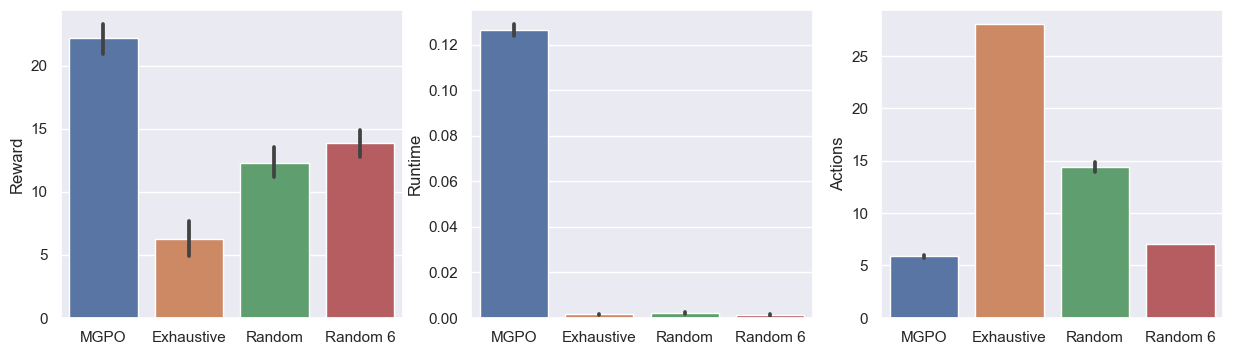

In [46]:
fig, axes = plt.subplots(1,3, figsize=(15,4), sharex=False, sharey=False)
axes = axes.flatten()

g = sns.barplot(data=res, x="algorithm", y="reward", ax=axes[0])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Reward")

g = sns.barplot(data=res, x="algorithm", y="runtime", ax=axes[1])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Runtime")

g = sns.barplot(data=res, x="algorithm", y="actions", ax=axes[2])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Actions")